In [4]:
import pandas as pd

df = pd.read_csv("G:\\SHRUTI\\STUDIES\\Data Science\\InternetSpeed\\InternetSpeed.csv\\InternetSpeed.csv")

In [6]:
df.head()
df.describe()

,Ping_latency,Download_speed,Upload_speed,Packet_loss_rate,Router_distance,Network_congestion,ISP_quality,Connection_type_DSL,Connection_type_Cable,Connection_type_Fiber,Signal_strength,Weather_conditions,Internet_speed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,27.357440,51.691277,26.066003,1.015369,5.578994,2.965295,6.504300,1.272947,1.256751,1.273640,84.948302,2.499880,1257.296163
std,13.033514,27.133568,13.956951,0.575612,2.598671,1.138216,2.018279,1.637940,1.625825,1.631132,8.609663,1.438197,927.617450
min,5.000524,5.005019,2.007572,0.000505,1.000433,1.000441,3.000039,0.000000,0.000000,0.000000,70.001406,0.003471,80.606669
25%,15.973826,28.478861,13.864032,0.525459,3.330062,1.988582,4.732669,0.000000,0.000000,0.000000,77.742714,1.244065,430.808067
50%,27.500388,51.167300,25.817462,1.024899,5.620063,2.963910,6.513309,0.032340,0.002561,0.031585,84.822169,2.511349,1018.976847
75%,38.664539,74.670302,38.509712,1.502211,7.819270,3.928608,8.237586,2.537834,2.507974,2.547957,92.345908,3.771796,1951.295923
max,49.987295,99.952993,49.990647,1.999850,9.999109,4.998928,9.998526,4.999453,4.999785,4.998248,99.998191,4.998094,3364.871190


In [8]:
missing_values = df.isnull().sum()
print(missing_values)

Ping_latency             0
Download_speed           0
Upload_speed             0
Packet_loss_rate         0
Router_distance          0
Network_congestion       0
ISP_quality              0
Connection_type_DSL      0
Connection_type_Cable    0
Connection_type_Fiber    0
Signal_strength          0
Weather_conditions       0
Internet_speed           0
dtype: int64


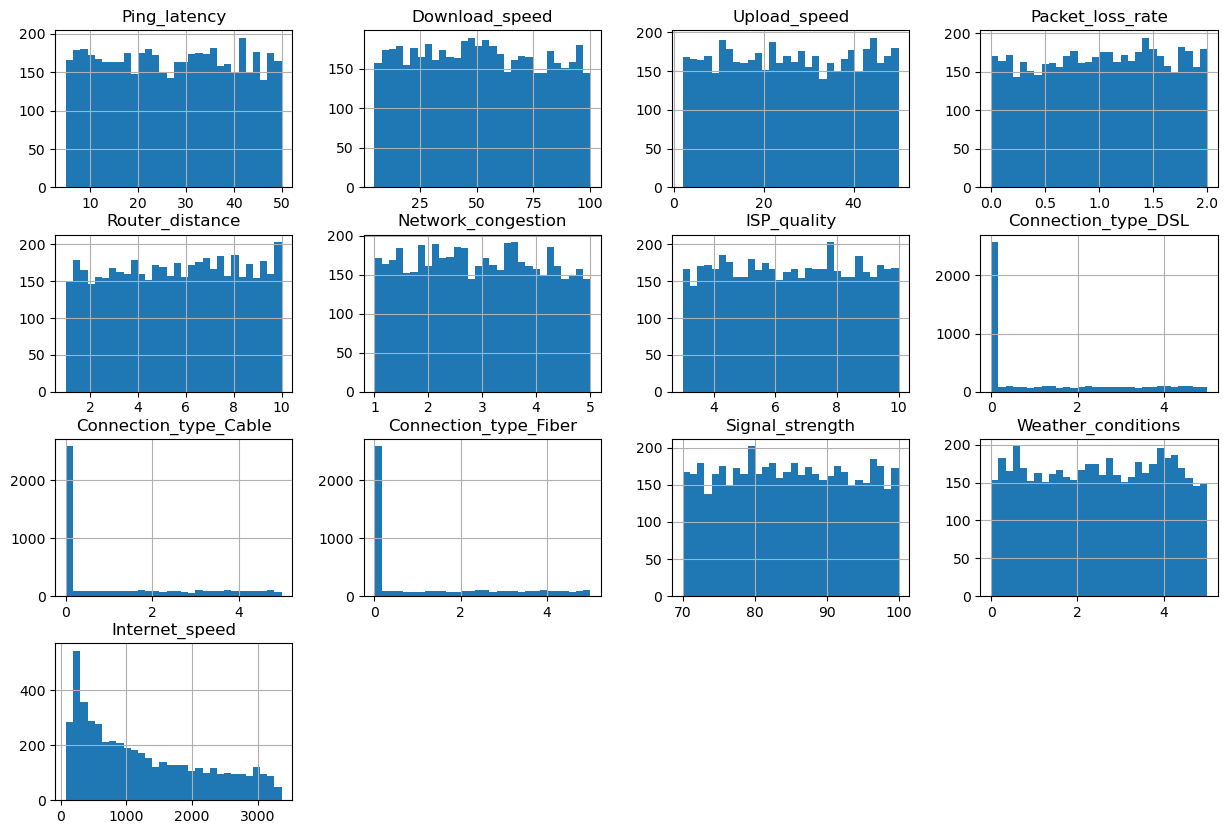

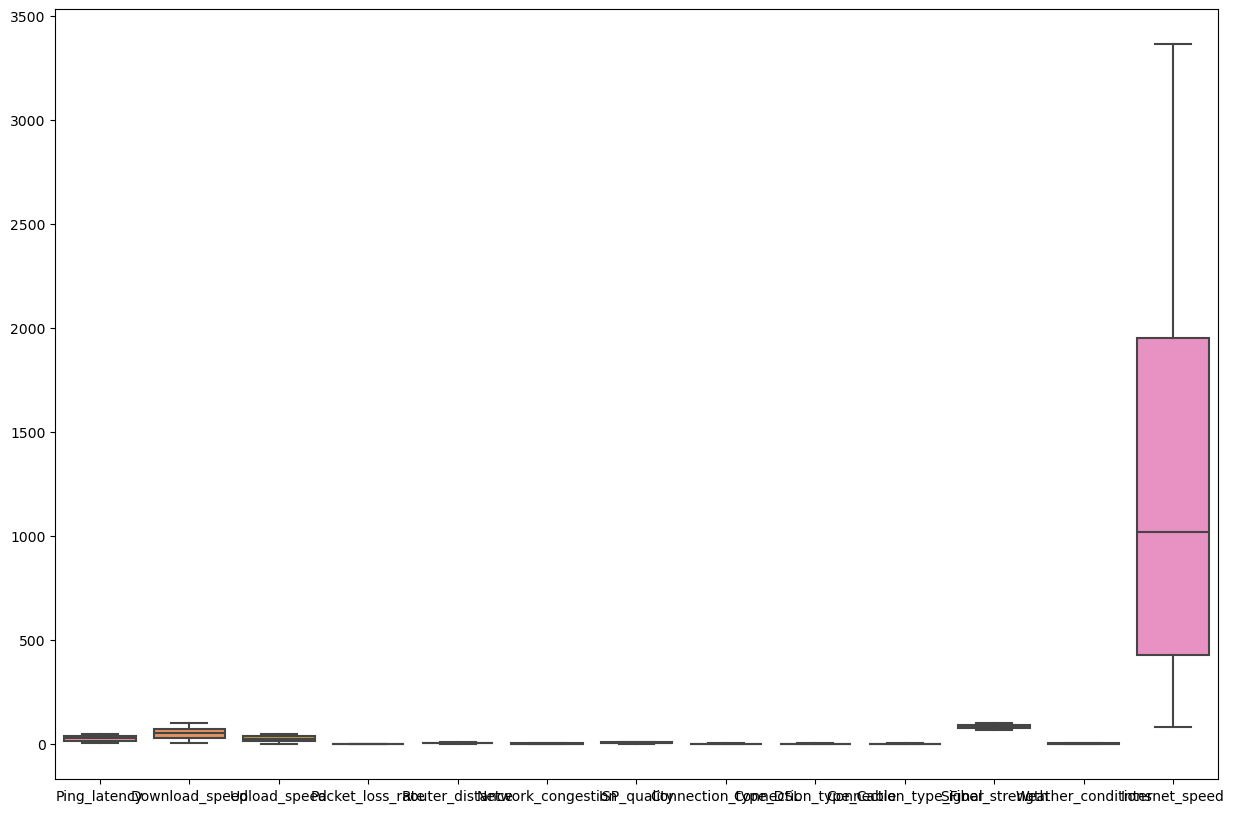

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10))
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.show()

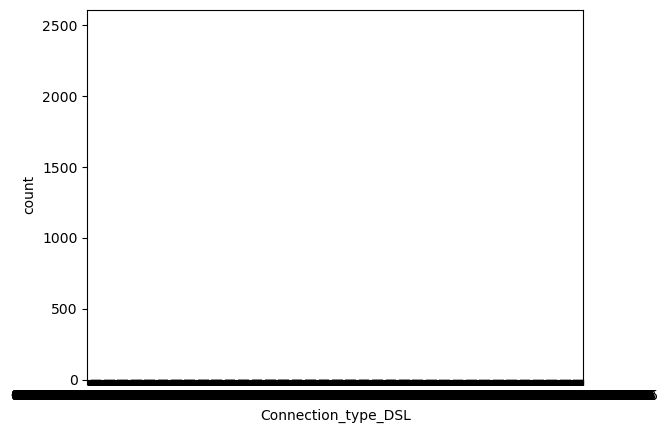

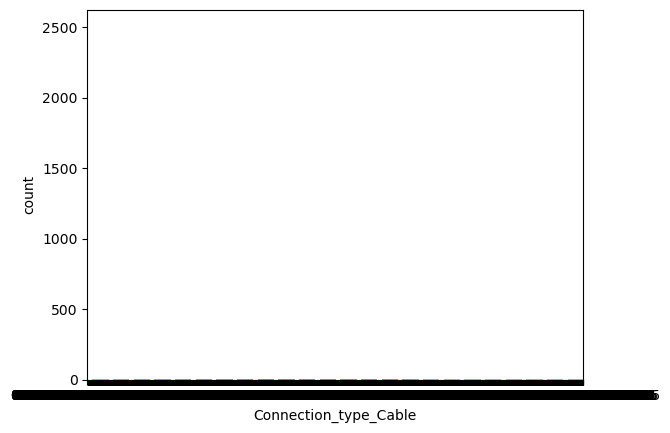

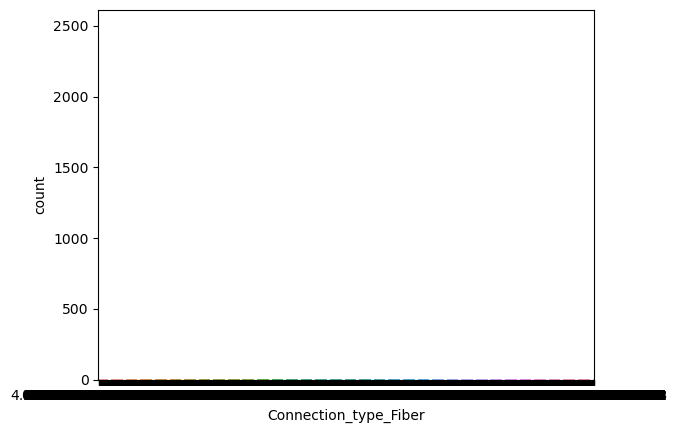

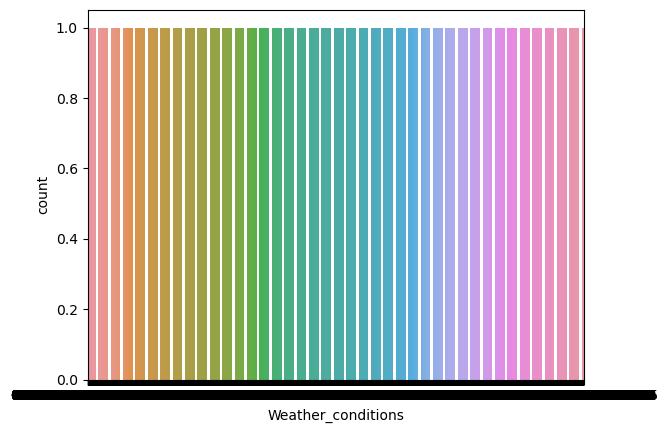

In [14]:
categorical_features = ['Connection_type_DSL', 'Connection_type_Cable', 'Connection_type_Fiber', 'Weather_conditions']
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.show()

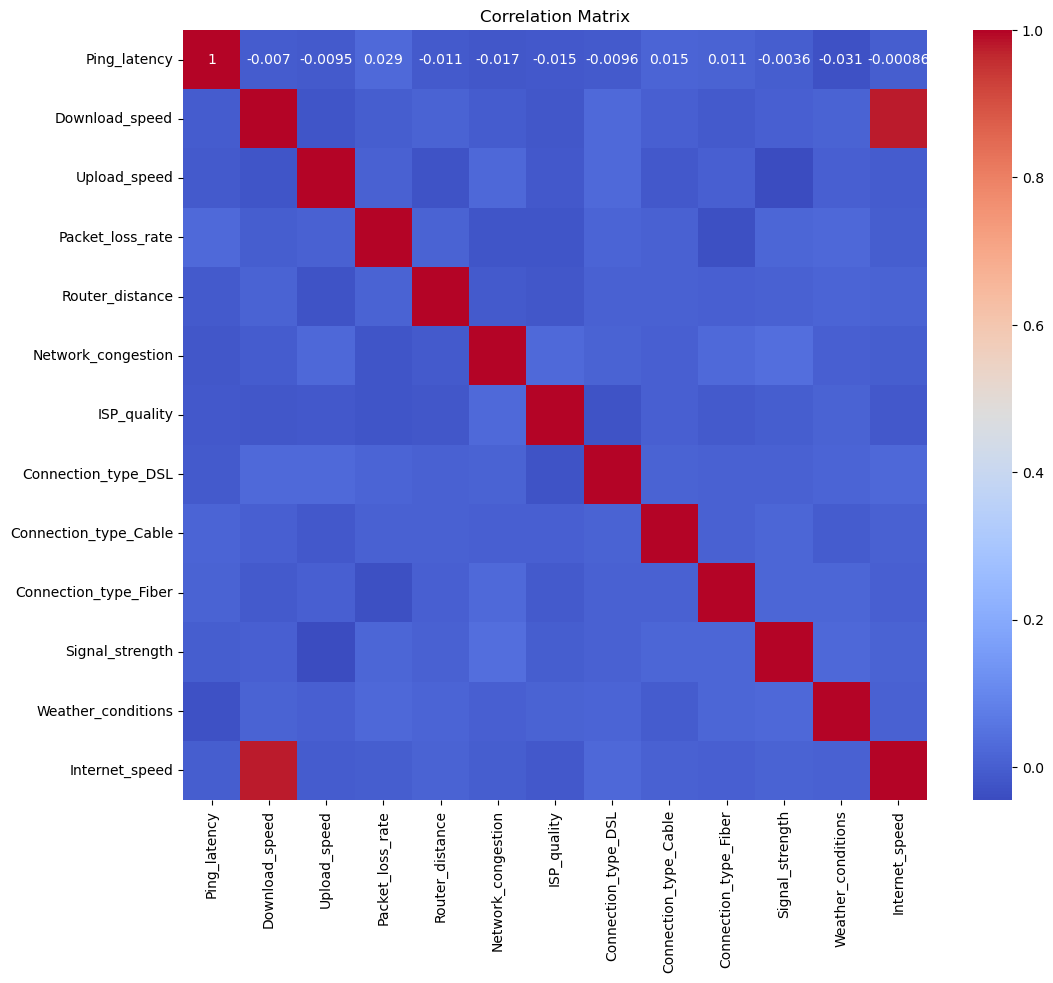

In [18]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

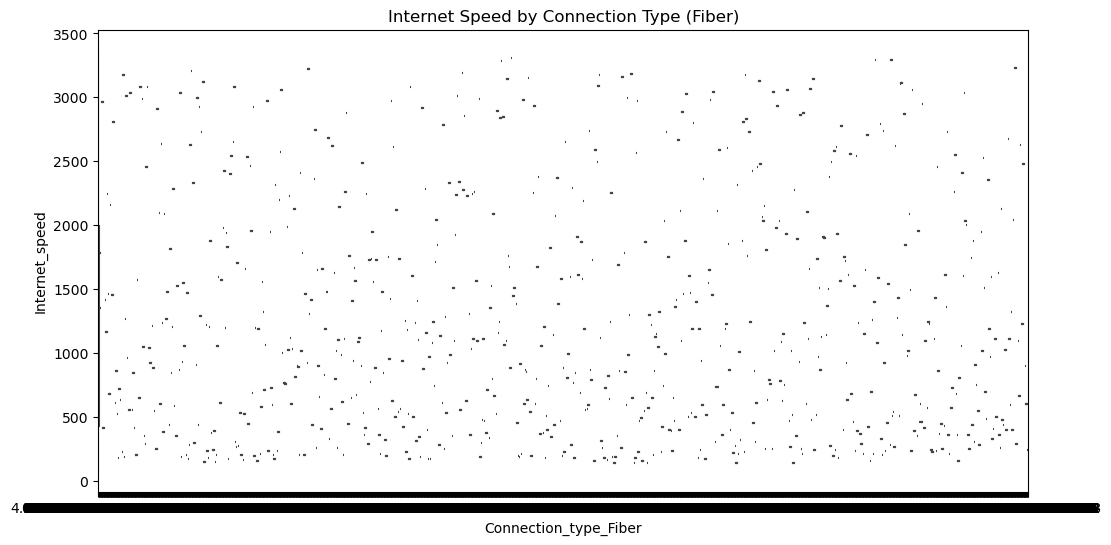

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Connection_type_Fiber', y='Internet_speed', data=df) # Adjust based on your dataset's categorical variables
plt.title('Internet Speed by Connection Type (Fiber)')
plt.show()

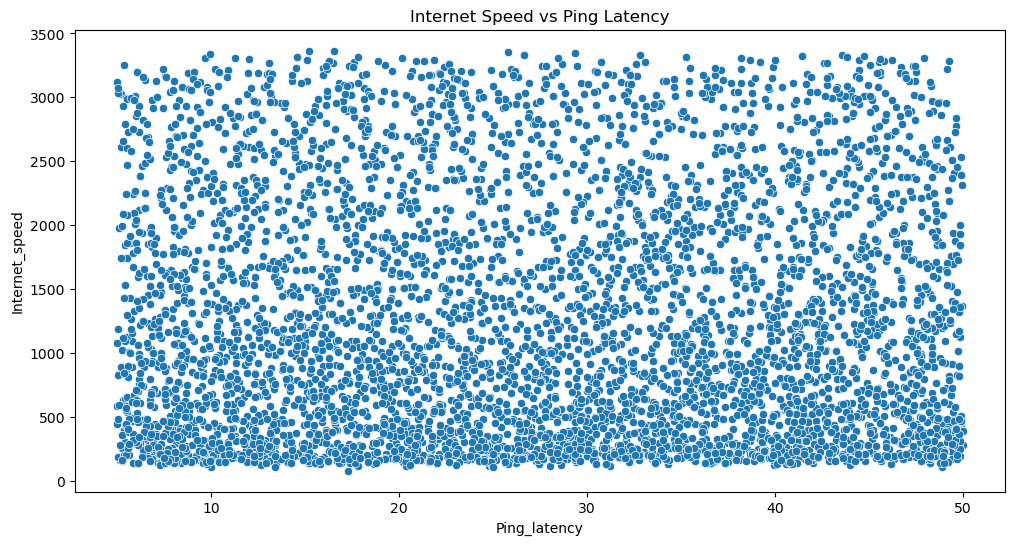

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Ping_latency', y='Internet_speed', data=df)
plt.title('Internet Speed vs Ping Latency')
plt.show()


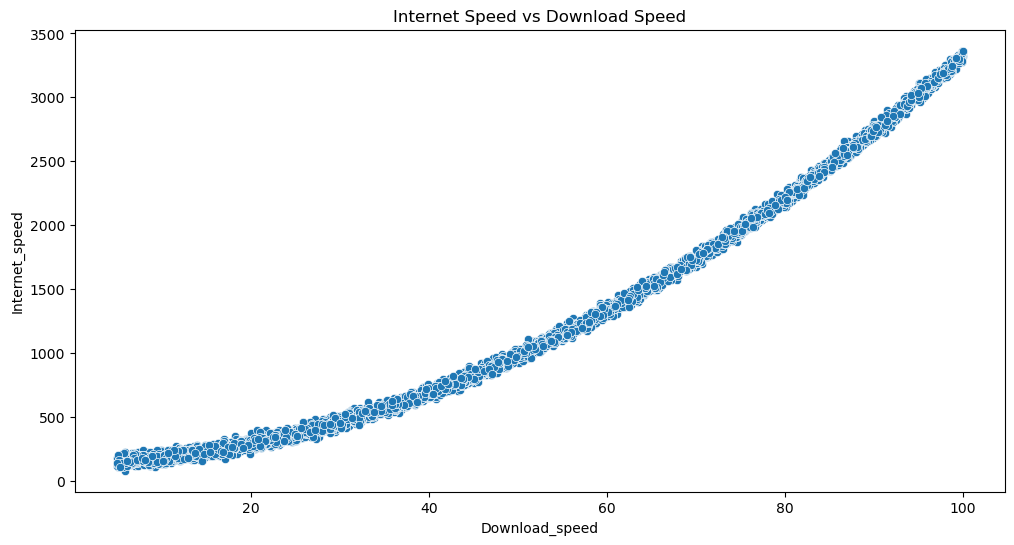

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Download_speed', y='Internet_speed', data=df)
plt.title('Internet Speed vs Download Speed')
plt.show()


In [28]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
outliers = (np.abs(z_scores) > 3).sum(axis=1)
print(outliers.value_counts())

0    5000
Name: count, dtype: int64
